<a href="https://colab.research.google.com/github/urfa10/MSIB_Data-Science/blob/main/MSIB_Studycase_heatingOil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding

sarah sebagai regional sales manager ingin mengestimasi berapa banyak minyak pemanas (heatingOil) yang harus disiapkan agar memenuhi permintaan custommers baru. dengan hal tersebut diharapkan dia dapat mengantisipasi adanya kelebihan  atau kekurangan jumlah permintaan akan produk.



## Stock LEVEL

Predictive Stock level untuk kecukupan pelanggan baru sebanyak 42.650pelanggan . pelanggan yang ada (current pelanggan) 1218 pelanggan



Artinya ibu sarah harus mencukupi ketersediaan heating oil untuk 42650+1218


Case -- Supervised Learning-- Estimasi


Algoritma estimasi
1. linear regresion
2. ANN: MLP (MULTI LAYER PERCEPTION


## Data undesrtanding


In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= '/content/drive/MyDrive/Colab Notebooks/DataSource/heatingOilTrainingset.csv'

In [ ]:
#loading Data
load_heatingoil=pd.read_csv(path)

# membentuk data frame
df= pd.DataFrame(load_heatingoil)

df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


In [ ]:
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [ ]:
df.isna().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


## Analisis korelasi

<Axes: title={'center': 'Person Correlation'}>

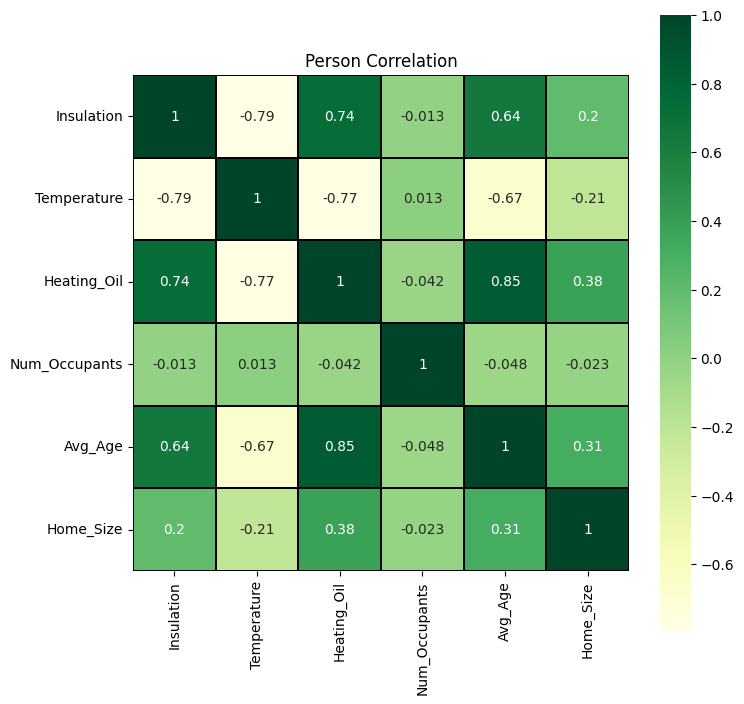

In [ ]:
f, ax=plt.subplots(figsize=(8,8))
plt.title('Person Correlation')
sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap='YlGn', linecolor='black', annot=True)

## Hasil analisis berguna untuk fitue selection

Dependent variabel :heating oil

1. Ada hubungan postif menguatkan antara insulation dgn heating oil

2. Ada hubungan negatif melemahkan  antara Temperatur dgn heating oil. semakin suhunya tinggimaka kebutuhan heating oil semakin sedikit.

3. Ada hubungan negatif melemahkan  antara num_uccupan dgn heating oil.artinya semakin banyak org yg tinggal d dlm rmh tersebut maka semakin sedikit kebutuhan oil. hasil menunjukkan angka 0.042(tidak signifikan)

4. Semakin banyak/tinggi usia rata2 penghuni maka semakin tinggi kebutuhan heating oil.

5. tidak ada hubungan yang mempengaruhi scr
signifikan antara homesize dengan heatingoil

## Data Preparation

In [ ]:
# input variabel

x=df[['Insulation',	'Temperature',	'Avg_Age',	'Home_Size']]


# target variabel

y=df['Heating_Oil']

## Pemodelan data

In [ ]:
# Split training and testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:


x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

## linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln=LinearRegression()

# training model

#memodelkan data menggunakan algortima linear regression
model_ln=ln.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_ln=model_ln.predict(x_test)

## evaluasipemodelan linear regresion

1. MAPE
2. R^2
3. MAE

In [ ]:
# untuk evaluasi model
from sklearn import metrics

In [ ]:
#Nilai R2

print('R Square:', metrics.r2_score(y_test, pred_ln))

R Square: 0.8113780027125741


In [ ]:
#Membuat Script MAPE
def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs(y_true-y_pred)/y_true)*100

print('MAPE:', mean_absolut_percentage_error(y_test,pred_ln))

MAPE: 7.854285481976761


## ANN (Artificial Neural Network)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp=MLPRegressor(hidden_layer_sizes=(2,2),activation='relu')

#ReLU : Fungsi aktivasi yang memingkan model untuk menyelesaikan masalah nonlinear
#Rectified Linier Unit

#memodelkan data menggunakan algortima linear regression
model_mlp=mlp.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_mlp=model_mlp.predict(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Nilai R2

print('R Square:', metrics.r2_score(y_test, pred_mlp))

R Square: 0.2683519046781674


In [ ]:
#Membuat Script MAPE
def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs(y_true-y_pred)/y_true)*100

print('MAPE:', mean_absolut_percentage_error(y_test,pred_mlp))

MAPE: 20.246969433968967


Karena meninjau dari evaluasi MAPE yang menilai error suatu prediksi dengan hasil lebih rendah, dirasa lebih faktual dengan datavreal yang ada. Jika linearitasnya tingi tapi error besar itu terhitung overfitting.

## Implementasi Model

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/DataSource/heatingOilNewust.csv'

In [ ]:
load_ho=pd.read_csv(path)
df1=pd.DataFrame(load_ho)
df1.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


##APply Model

In [ ]:
x1=df1[['Insulation',	'Temperature'	,'Avg_Age'	,'Home_Size']]

In [ ]:
prediction=model_mlp.predict(x1)
prediction

array([271.91471548, 273.41374945, 290.82821724, ..., 159.26675013,
       244.26232441, 257.9498192 ])

In [ ]:
df_result=pd.DataFrame({'Prediction': prediction}).round(2)
df_result.head()

,Prediction
0,271.91
1,273.41
2,290.83
3,240.45
4,138.18


In [ ]:
#Mengabungkan Data Frame hasil prediksi dengan Data Frame Input Variabel

df_pred_ho=pd.concat([df1,df_result], sort=True, axis=1)
df_pred_ho.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction
0,5,69,10,70.1,7,271.91
1,5,80,1,66.7,1,273.41
2,4,89,9,67.8,7,290.83
3,7,81,9,52.4,6,240.45
4,4,58,8,22.9,7,138.18


In [ ]:
#Eksport to CSV
#Eksport as downlod if in colab
from google.colab import files
#Menimpan File/Export File to Local computer output CSV file
df_pred_ho.to_csv('df_predict_ho.csv',sep=',')
files.download('df_predict_ho.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>